⚠️ Nenhum dado encontrado no canal. Usando dados simulados...
💾 Dados salvos em thingspeak_data.json
Tempo: 2025-09-17 22:49:51, Umidade: 60.0%, Temperatura: 20.0°C
Tempo: 2025-09-17 22:50:51, Umidade: 62.5%, Temperatura: 20.7°C
Tempo: 2025-09-17 22:51:51, Umidade: 65.0%, Temperatura: 21.0°C
Tempo: 2025-09-17 22:52:51, Umidade: 66.0%, Temperatura: 21.7°C
Tempo: 2025-09-17 22:53:51, Umidade: 68.5%, Temperatura: 22.0°C
Tempo: 2025-09-17 22:54:51, Umidade: 71.0%, Temperatura: 22.7°C
📊 Dashboard salvo como thingspeak_dashboard.png


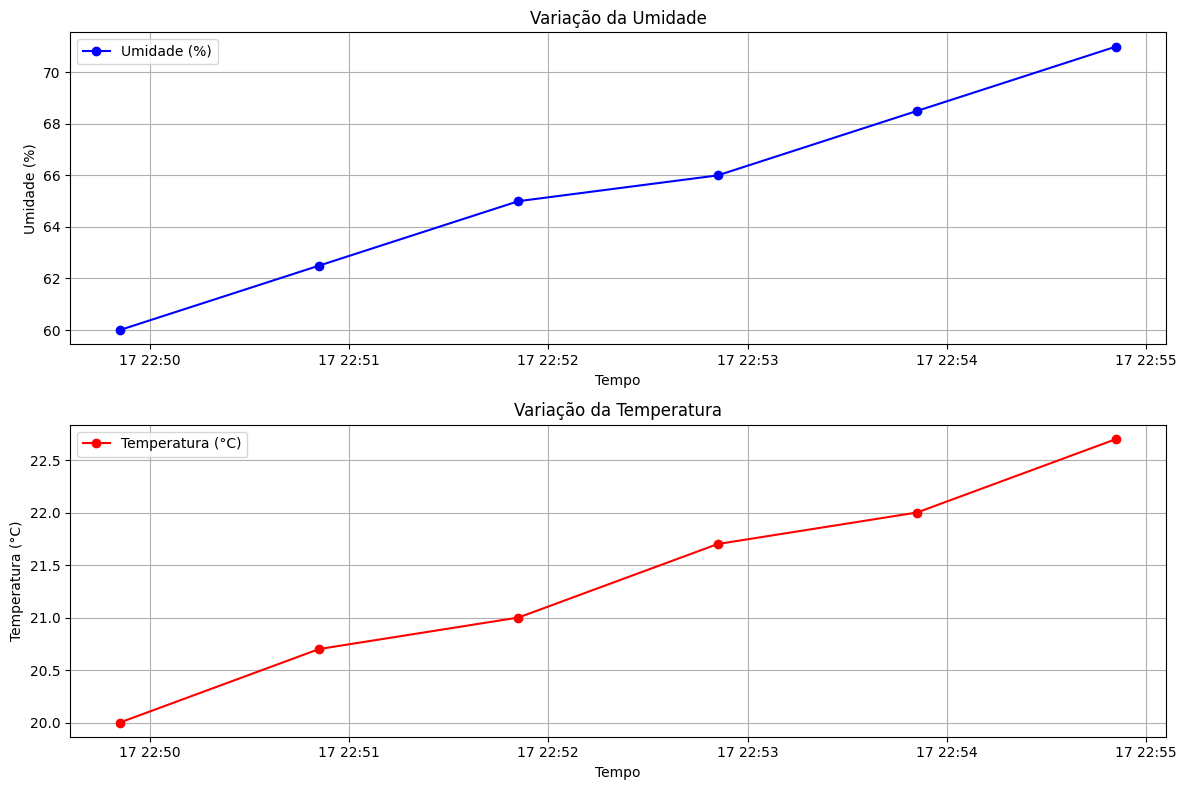

In [1]:
import requests
import json
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# Configurações do canal ThingSpeak
CHANNEL_ID = "3077403"
READ_API_KEY = "1M8XC505ABUDW02M"
BASE_URL = f"https://api.thingspeak.com/channels/{CHANNEL_ID}/feeds.json"

# Parâmetros da requisição
PARAMS = {
    "api_key": READ_API_KEY,
    "results": 100  # Últimos 100 resultados
}

def gerar_dados_simulados():
    """Gera dados simulados caso a API não retorne valores."""
    print("Nenhum dado encontrado no canal. Usando dados simulados...")
    feeds = []
    inicio = datetime.now() - timedelta(minutes=5)

    for i in range(6):
        timestamp = inicio + timedelta(minutes=i)
        umidade = 60 + (i * 2) + (i % 3) * 0.5
        temperatura = 20 + (i * 0.5) + (i % 2) * 0.2
        feeds.append({
            "created_at": timestamp.strftime("%Y-%m-%dT%H:%M:%SZ"),
            "field1": str(round(umidade, 2)),
            "field2": str(round(temperatura, 2))
        })
    return feeds

def obter_dados():
    """Obtém dados do ThingSpeak ou gera dados simulados."""
    try:
        resposta = requests.get(BASE_URL, params=PARAMS, timeout=10)
        resposta.raise_for_status()
        dados = resposta.json()
        feeds = dados.get("feeds", [])
        return feeds if feeds else gerar_dados_simulados()
    except (requests.RequestException, json.JSONDecodeError) as e:
        print(f"Erro ao acessar API: {e}")
        return gerar_dados_simulados()

def processar_dados(feeds):
    """Processa os dados em listas de tempo, umidade e temperatura."""
    tempos, umidades, temperaturas = [], [], []

    for entrada in feeds:
        try:
            t = datetime.strptime(entrada["created_at"], "%Y-%m-%dT%H:%M:%SZ")
            u = float(entrada.get("field1", 0))
            temp = float(entrada.get("field2", 0))
            tempos.append(t)
            umidades.append(u)
            temperaturas.append(temp)
            print(f"Tempo: {t}, Umidade: {u}%, Temperatura: {temp}°C")
        except (ValueError, TypeError) as e:
            print(f"Erro ao processar entrada: {entrada} - {e}")

    return tempos, umidades, temperaturas

def salvar_json(feeds, arquivo="thingspeak_data.json"):
    """Salva os dados em um arquivo JSON."""
    with open(arquivo, "w") as f:
        json.dump(feeds, f, indent=4)
    print(f"Dados salvos em {arquivo}")

def gerar_graficos(tempos, umidades, temperaturas):
    """Gera e salva gráficos de umidade e temperatura."""
    if not (tempos and umidades and temperaturas):
        print("Dados insuficientes para gerar gráficos.")
        return

    plt.figure(figsize=(12, 8))

    # Gráfico da Umidade
    plt.subplot(2, 1, 1)
    plt.plot(tempos, umidades, label="Umidade (%)", color="blue", marker="o")
    plt.xlabel("Tempo")
    plt.ylabel("Umidade (%)")
    plt.title("Variação da Umidade")
    plt.grid(True)
    plt.legend()

    # Gráfico da Temperatura
    plt.subplot(2, 1, 2)
    plt.plot(tempos, temperaturas, label="Temperatura (°C)", color="red", marker="o")
    plt.xlabel("Tempo")
    plt.ylabel("Temperatura (°C)")
    plt.title("Variação da Temperatura")
    plt.grid(True)
    plt.legend()

    plt.tight_layout()
    plt.savefig("thingspeak_dashboard.png")
    print("Dashboard salvo como thingspeak_dashboard.png")

if __name__ == "__main__":
    feeds = obter_dados()
    salvar_json(feeds)
    tempos, umidades, temperaturas = processar_dados(feeds)
    gerar_graficos(tempos, umidades, temperaturas)
